**Importação dos Dados e Bibliotecas**

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [47]:
df = pd.read_csv("./data/diagnosed_cbc_data_v4.csv")

#PRÉ-PROCESSAMENTO

In [48]:
df.shape

(1281, 15)

In [49]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap="plasma")

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap="plasma")

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Como descrito pelos métodos isnull() e isna(), não existe nenhum valor nulo ou NaN (Not a Number) no dataset, o que denota que nenhuma técnica especial para a retirada de valores desse tipo precisa ser aplicada.

In [51]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

O método duplicated() demonstrou que existem 49 dados duplicados no dataset, provenientes do processo de coleta dos dados. Assim, para que esses dados não influenciem no procedimento, eles foram retirados e apenas um dos itens de cada duplicata permaneceu.

In [52]:
df.describe(include='all')

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323
mean,7.846713,25.897658,77.591978,1.884341,5.130724,4.714294,12.187589,46.269150,85.734099,32.250877,31.739732,228.927922,14.340931,0.261623,NaN
std,3.552180,7.064941,150.651596,1.357362,2.895636,2.867519,3.863201,106.945982,27.663902,113.356653,3.354512,93.080258,3.053868,0.698735,NaN
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.000000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000,NaN
25%,6.000000,25.845000,70.775000,1.880760,5.000000,4.190000,10.800000,39.200000,81.000000,25.500000,30.500000,157.000000,13.300000,0.170000,NaN
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.200000,46.152600,86.550000,27.700000,32.000000,211.000000,14.312512,0.260280,NaN
75%,8.700000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.152600,90.200000,29.600000,32.900000,290.000000,14.800000,0.260280,NaN


#Sobre o Dataset

- *HGB*: A quantidade de hemoglobina no sangue, crucial para o transporte de oxigênio.

- *PLT*: O número de plaquetas no sangue, envolvidas na coagulação do sangue.

- *WBC*: A contagem de glóbulos brancos, vitais para a resposta imunológica.

- *RBC*: A contagem de glóbulos vermelhos, responsáveis ​​pelo transporte de oxigênio.

- *MCV* (Volume Corpuscular Médio): Volume médio de um único glóbulo vermelho.

- *MCH* (Hemoglobina Corpuscular Média): Quantidade média de hemoglobina por glóbulo vermelho.

- *MCHC* (Concentração Média de Hemoglobina Corpuscular): Concentração média de hemoglobina nas hemácias.

- *PDW*: uma medida da variabilidade na distribuição do tamanho das plaquetas no sangue

- *PCT*: Um teste de procalcitonina pode ajudar seu médico a diagnosticar se você tem sepse causada por uma infecção bacteriana ou se tem alto risco de desenvolver sepse
 
- *LYMp*: Porcentagem de linfócitos
 
- *NEUTp*: Porcentagem de neutrófilos
 
- *LYMn*: Contagem absoluta de linfócitos
 
- *NEUTn*: contagem absoluta de neutrófilos
 
- *Diagnóstico*: Tipo de anemia com base nos parâmetros do hemograma completo

Com o método describe(), foi possível compreender que as colunas HGB (Hemoglobina) e MVC (Volume Celular Médio) possuem valores mínimos negativos, o que denota a presença de valores menores que zero no dataset. Isso não faz sentido do ponto de vista clínico:

- A hemoglobina é uma proteína presente nas células vermelhas do sangue que carregam oxigênio e seu nível é medido em gramas por decilitro (g/dL).

- O volume celular médio é um parâmetro que mede o tamanho médio das células vermelhas do sangue.

Como ambas as features demonstram quantidades e grandezas físicas, não é certo manter valores negativos para elas, uma vez que não é possível que o paciente apresente tais valores na realidade, demonstrando um erro no processo de coleta dos dados.

Assim, os valores negativos serão todos retirados do dataset.

In [53]:
df = df.drop(df[df["HGB"] < 0].index[0])
df = df.drop(df[df["MCV"] < 0].index[0])

In [54]:
mapping_dict = {}


encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Diagnosis'])
mapping_dict['Diagnosis'] = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
df['Diagnosis'] = encoded_data
df['Diagnosis'].value_counts()

0    323
5    271
6    255
1    182
8     72
7     56
2     44
4     16
3     11
Name: Diagnosis, dtype: int64

In [55]:
mapping_dict

{'Diagnosis': {0: 'Healthy',
  1: 'Iron deficiency anemia',
  2: 'Leukemia',
  3: 'Leukemia with thrombocytopenia',
  4: 'Macrocytic anemia',
  5: 'Normocytic hypochromic anemia',
  6: 'Normocytic normochromic anemia',
  7: 'Other microcytic anemia',
  8: 'Thrombocytopenia'}}

Como o target do dataset, no caso o campo "Diagnosis" é um campo categórico, foi empregado o método LabelEncoder() da biblioteca Scikit-Learn para transformar essas variavéis categóricas em variáveis numéricas, o que será importante para o procedimento de treinamento

/tmp/ipykernel_25170/1916606599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Diagnosis', palette='plasma', width=0.6)


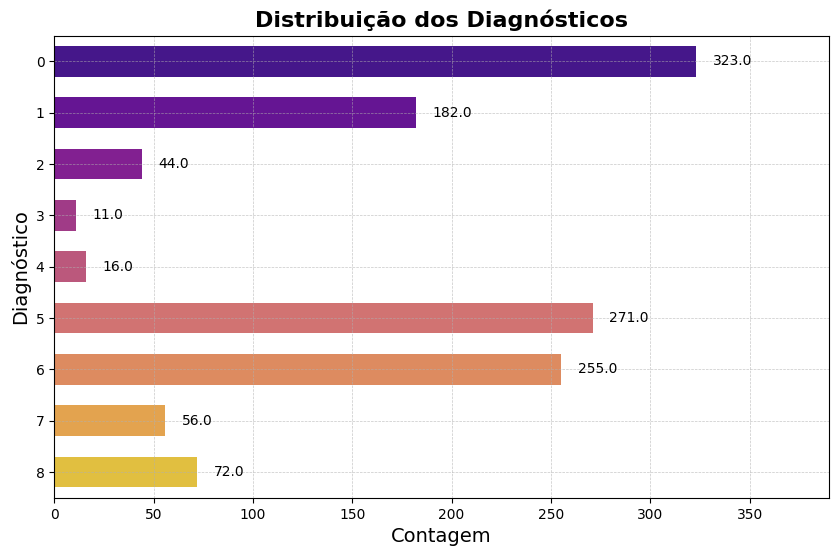

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Diagnosis', palette='plasma', width=0.6)

ax.set_title('Distribuição dos Diagnósticos', fontsize=16, fontweight='bold')
ax.set_xlabel('Contagem', fontsize=14)
ax.set_ylabel('Diagnóstico', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(0, 390)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(12, 0),
                textcoords='offset points')

plt.show()
plt.close()

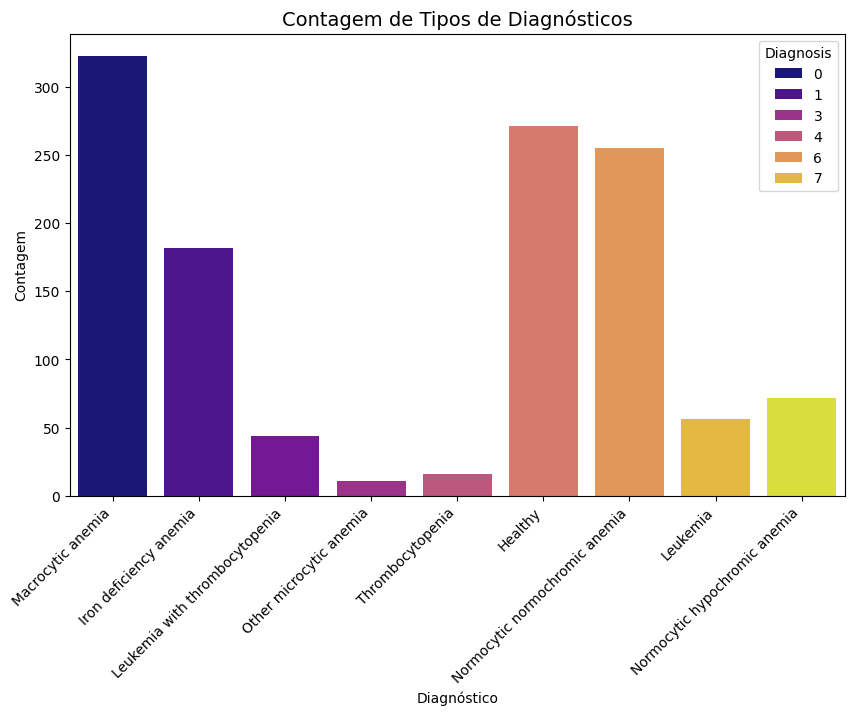

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=df,hue='Diagnosis', palette='plasma')

plt.title('Contagem de Tipos de Diagnósticos', fontsize=14)
ax.set_xticks(df['Diagnosis'].unique())
ax.set_xticklabels(labels=mapping_dict['Diagnosis'].values(), rotation=45, horizontalalignment='right')
ax.set_ylabel('Contagem', fontsize=10)
ax.set_xlabel('Diagnóstico', fontsize=10)

plt.show()

Percebe-se que o dataset não está balanceado, uma vez que algumas classes são majoritárias, enquanto outras apresentam apenas algumas poucas amostras. Isso deverá ser levado em consideração ao treinar os modelos de Machine Learning, para não enviesar os modelos. Uma técnica para evitar isso é a aplicação de KFold, que será feita mais adiante.

Text(0.5, 0.98, 'Display of Box and Whisker Chart')

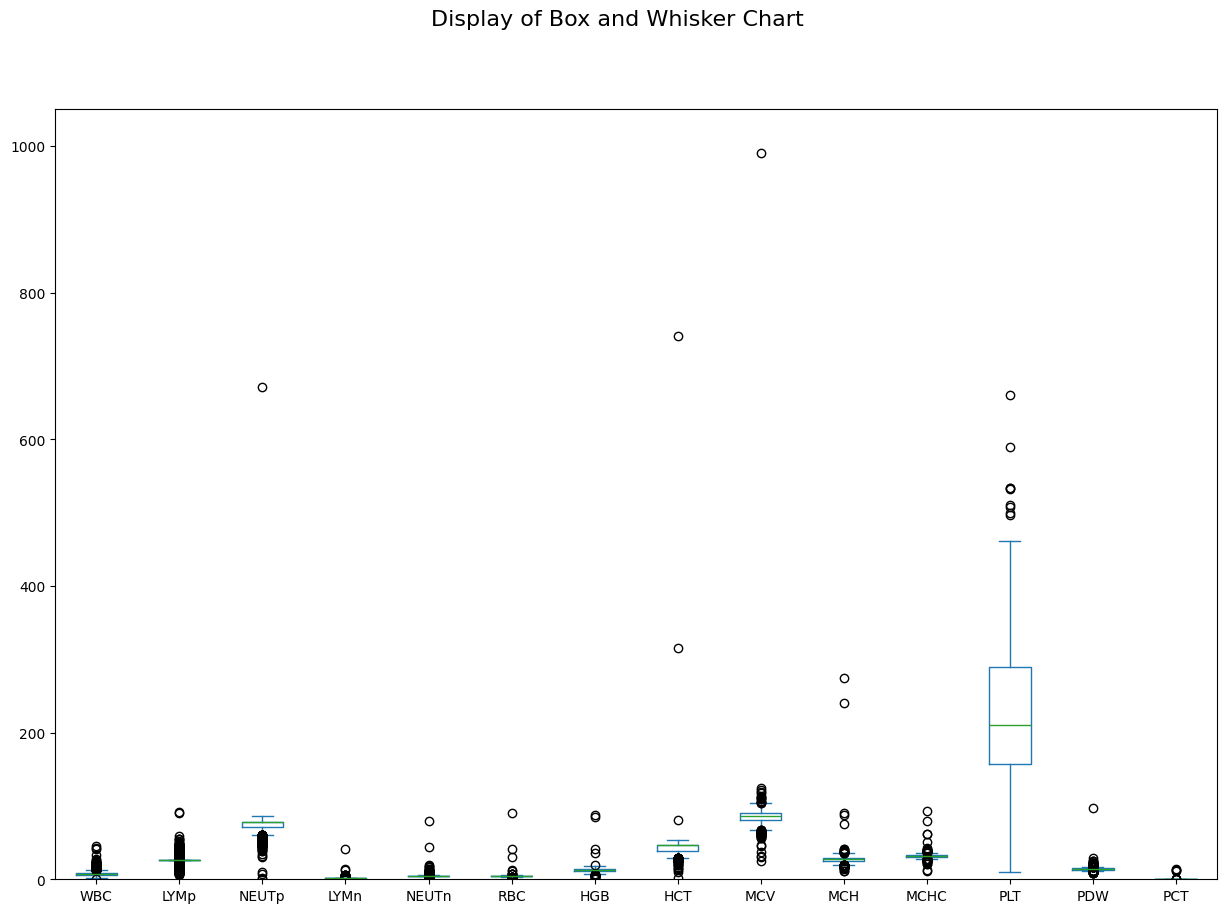

In [58]:
df.drop(['Diagnosis'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 1050)
plt.suptitle ('Display of Box and Whisker Chart', size=16)

Percebe-se que o campo PLT (Plaquetas) possui uma contagem muito maior do que os demais campos. Isso era de se esperar, uma vez que uma condição anêmica pode levar a um estímulo da medula óssea, que passa a aumentar a produção das linhas celulares, especialmente as plaquetas. Isso acontece como uma tentativa do corpo de compensar a redução na capacidade de circulação e transporte de oxigênio. Assim, pode-se analisar a distribuição dos demais campos ignorando momentaneamente o campo PLT. Além disso, como o objetivo não é a avaliação do campo de diagnósticos (Diagnosis), este permanecerá omitido.

Text(0.5, 0.98, 'Display of Box and Whisker Chart')

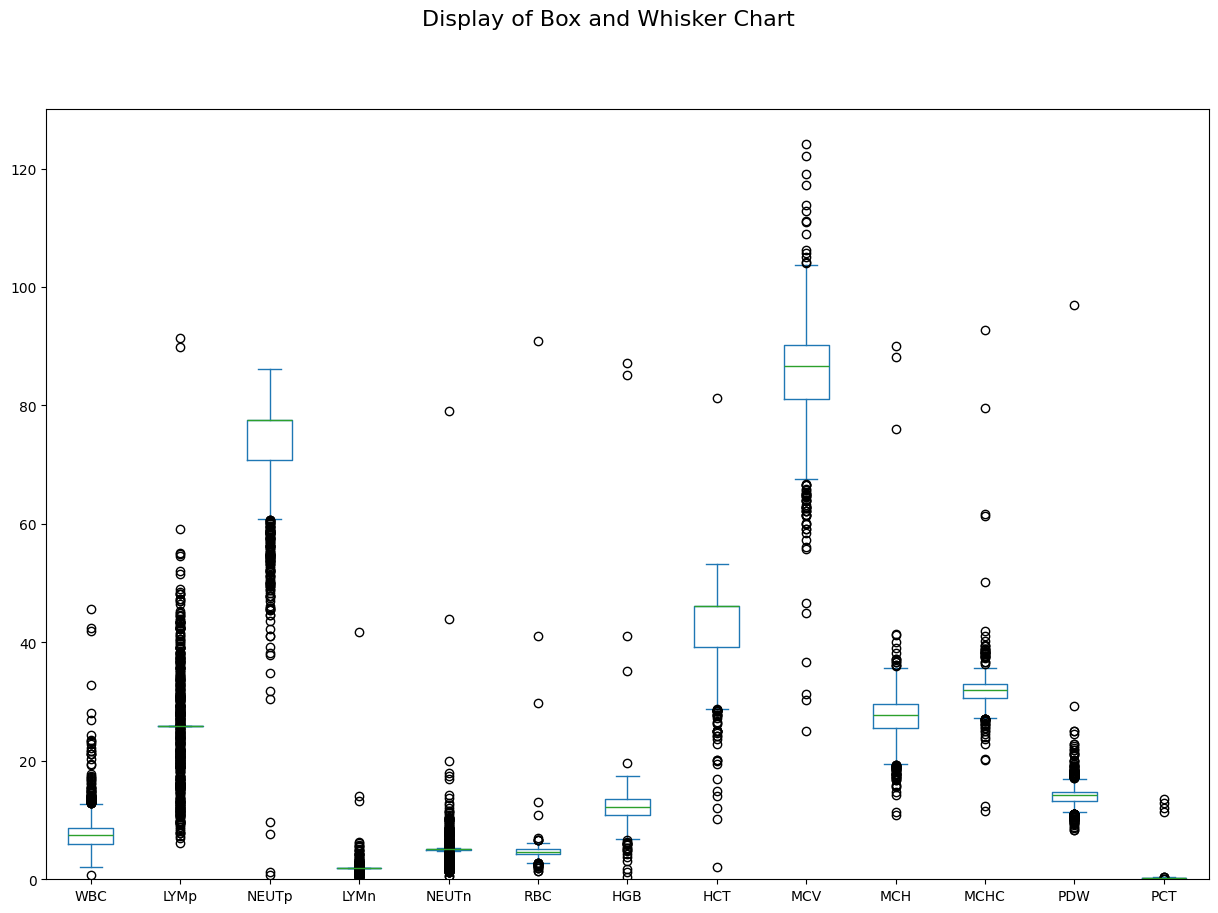

In [59]:
df.drop(['Diagnosis', 'PLT'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 130)
plt.suptitle ('Display of Box and Whisker Chart', size=16)

In [60]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_data = df[filtered_entries]
filtered_data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
6,16.70,19.100,68.200,3.20000,11.40000,5.15,14.2,44.8000,87.1,27.5,31.6,151.0,12.800000,0.14000,2
7,9.30,27.400,64.000,2.60000,5.90000,4.39,12.0,37.9000,86.4,27.3,31.6,194.0,15.900000,0.19000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


Segundo (Schiffler, 1988), uma amostra que possui um Z-score maior do que 3 pode ser considerada como outlier. Isso é válido para qualquer conjunto de dados pelo menos 11 amostras, o que é o caso do dataset em questão. Assim, foram retirados do conjunto de dados todos os valores que estão acima desse limite.

Text(0.5, 0.98, 'Display of the refined box and whisker plot')

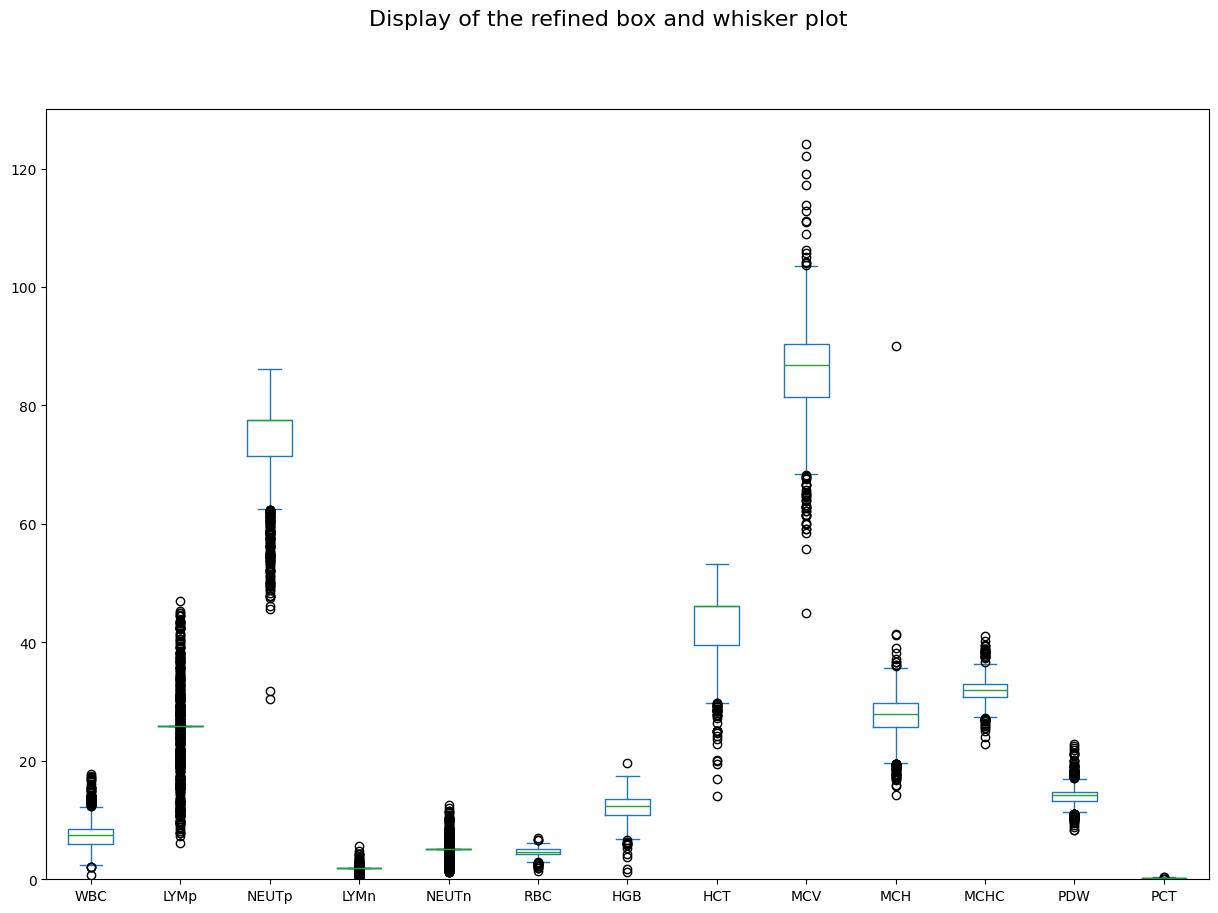

In [61]:
filtered_data.drop(['PLT', 'Diagnosis'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 130)
plt.suptitle ('Display of the refined box and whisker plot', size=16)

/tmp/ipykernel_25170/3283066740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Diagnosis"] = filtered_data["Diagnosis"].replace(mapping_dict["Diagnosis"])


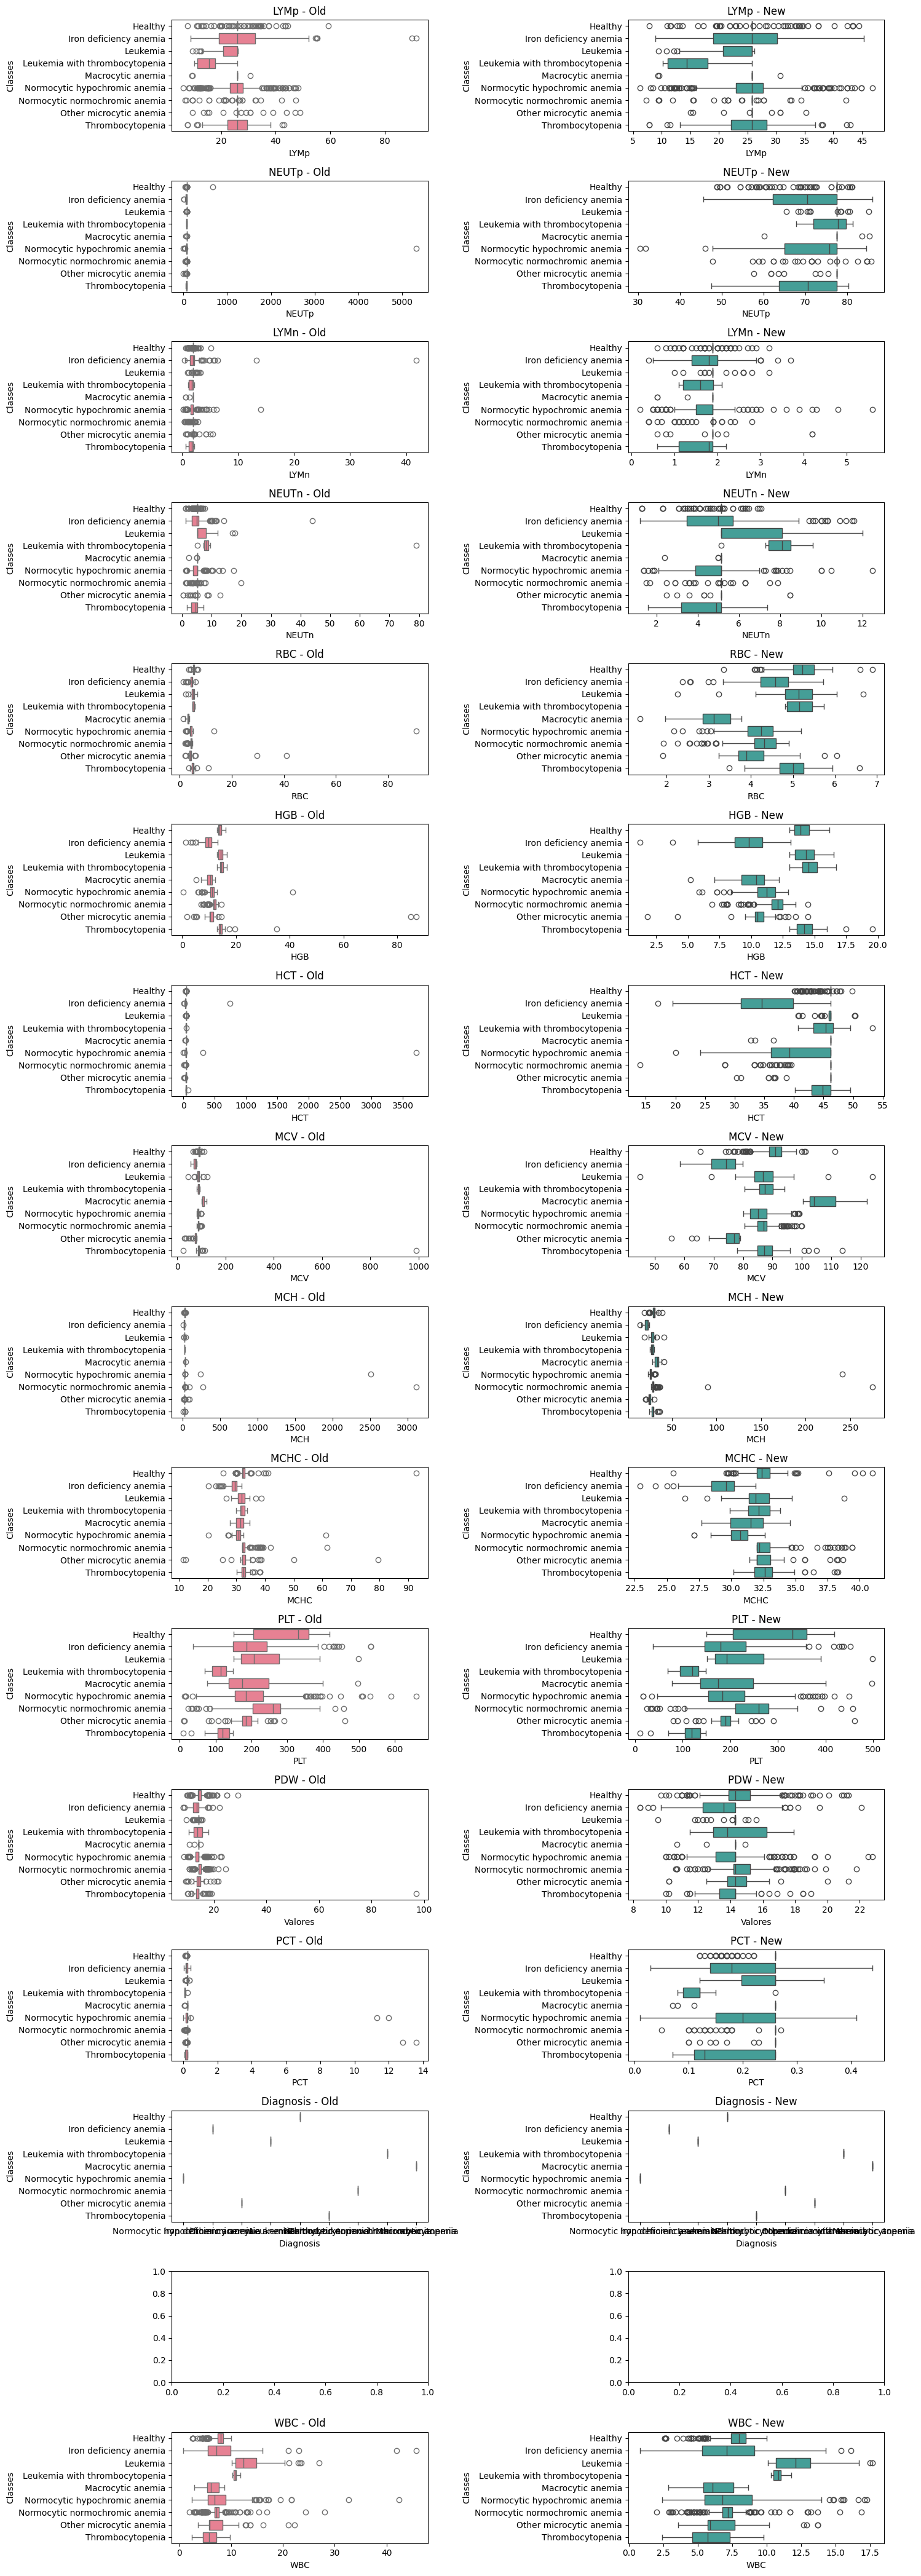

In [64]:
df["Diagnosis"] = df["Diagnosis"].replace(mapping_dict["Diagnosis"])
filtered_data["Diagnosis"] = filtered_data["Diagnosis"].replace(mapping_dict["Diagnosis"])

class_order = sorted(df['Diagnosis'].unique())

# Definir uma paleta de cores
palette = sns.color_palette("husl", n_colors=2)

# Criar boxplots horizontais para cada feature
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(15, 3 * 14), sharex=False)

for i, feature in enumerate(df.columns):
    sns.boxplot(x=feature, y="Diagnosis", data=filtered_data, orient='h', ax=axes[i-1, 1], color=palette[1], order=class_order)
    sns.boxplot(x=feature, y="Diagnosis", data=df, orient='h', ax=axes[i-1, 0], color=palette[0], order=class_order)
    
    axes[i-1, 0].set_title(f'{feature} - Old')
    axes[i-1, 1].set_title(f'{feature} - New')
    
    if i == 13 - 1:  # Only set xlabel for the last row
        axes[i-1, 0].set_xlabel('Valores')
        axes[i-1, 1].set_xlabel('Valores')
    
    axes[i-1, 0].set_ylabel('Classes')
    axes[i-1, 1].set_ylabel('Classes')

plt.tight_layout()
plt.show()
plt.close()

A distribuição dos dados de cada feature para cada diagnóstico pode ser bem melhor avaliada com a remoção dos outliers.

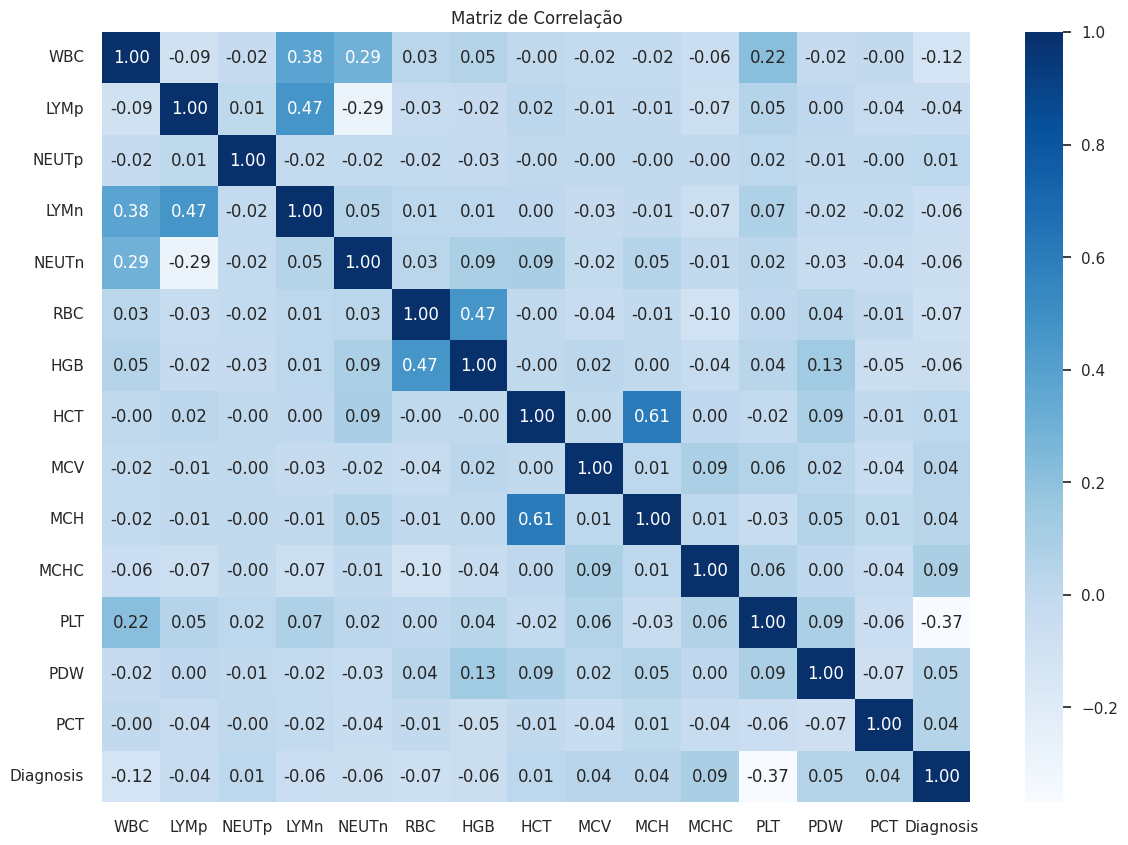

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()
plt.close()

Foi plotada a matriz de correlação das features por meio do cálculos dos coeficientes de Pearson, de forma a definir o grau de relação entre as features em direção positiva ou negativa. Ao olhar para a última linha da matriz, referente à variável a ser predita (i.e, o target do dataset, o Diagnóstico), percebe-se que apenas a feature PLT (Plaquetas) tem uma maior correlação com o Diagnóstico. Entretanto, coeficientes de Pearson entre 0.3 e 0.5 (positivos ou negativos), denotam uma correlação fraca entre as features. Dessa forma, não há problema em manter o campo PLT, pois seu grau de correlação não tem relevância suficiente para inteferir no modelo de predição.

Além disso, entre as demais features, apenas a Hemoglobina Celular Média (MCH) e o Hematócrito (HCT) apresentam coeficiente de Pearson acima de 0.5. Entretanto, ainda está entre 0.5 e 0.7, o que denota uma correlação moderada. A sua retirada não teria efeitos práticos na predição e ambas as features podem ser mantidas no dataset. O único possível efeito ao retirar uma das variáveis seria um aumento na eficiência do processo computacional. Entretanto, devido ao dataset não ser muito grande, esse efeito não seria perceptível.

Do ponto de vista clínico, novamente a correlação das features condiz com o problema estudado. Percebe-se que o Diagnóstico é mais fortemente influenciado pela contagem de Plaquetas, o que é esperado, uma vez que condições de anemia levam a um estímulo maior da medula óssea (que, por sua vez, tenta compensar a redução na capacidade de transporte de oxigênio no sangue), que passa a produzir mais células, em especial as plaquetas.

Da mesma forma, a Hemoglobina Celular Média (MCH) está relacionada com o Hematócrito (HCT), uma vez que este último diz respeito à porcentagem de hemácias presentes no volume total do sangue. Assim, como as hemácias são formadas por hemoglobina e globulina, é natural que o Hematócrito apresente relação com a Hemoglobina Celular Média. O mesmo ocorre entre a Contagem de Células Vermelhas (RBC), que são as hemácias, e a Hemoglobina Celular Média (MCH).

Também é natural que as features ligadas à porcentagem e contagem absoluta de neutrófilos e linfócitos estejam mais fortemente relacionadas com a Contagem de Células Brancas (WBC), uma vez que os neutrófilos e linfócitos são leucócitos (células brancas), responsáveis pela defesa do organismo.

#TREINAMENTO DE MODELOS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

**Definindo Hiperparâmetros**

In [ ]:
param_grids = {
    'KNN': {
        'model__n_neighbors': [3,5,7,9], 
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    },
    'GaussianNB': {},
    'Random Forest': {
        'model__n_estimators': [100, 200, 300], 
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200], 
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'model__gamma': [0, 0.1, 0.2]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'model__n_estimators': [50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 1, 10]
    },
    'Gradient Boost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'model__gamma': ['scale', 'auto']
    },
    'MLP': {
        'model__activation': ['tanh', 'relu', 'sigmoid', 'softmax'],
        'model__alpha': [0.0001, 0.001, 0.01]
    }
}

models = {
    'KNN' : KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(multi_class='auto', random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'MLP': MLPClassifier(random_state=42)
}

In [ ]:
def create_pipelines(models):
    return {
        name: Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        for name, model in models.items()
    }
    
def find_best_models(path, pipelines, param_grids, X, y):
    best_models = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    with open(path + "best_models.txt", "w") as file:
        file.write("Results GridSearchCV:\n")

    with open(path + "best_models.txt", "a") as file:
        for name, pipeline in pipelines.items():
            grid_search = GridSearchCV(
                pipeline,
                param_grids[name],
                scoring='accuracy',
                refit='mse',
                cv=KFold(n_splits=2,shuffle=True,random_state=42),
                error_score='raise'
            )

    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
                
    file.write(str(best_models[name]) + "\n\n")

**Treinando os modelos**

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes, model, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    Plota uma matriz de confusão.

    Parâmetros:
    - y_true: rótulos verdadeiros
    - y_pred: rótulos previstos pelo modelo
    - classes: lista das classes únicas
    - normalize: se True, as contagens na matriz de confusão serão normalizadas
    - title: título do gráfico
    - cmap: mapa de cores para a matriz
    """
   # Criando a matriz de confusão
    # Criando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Normalizando a matriz de confusão para porcentagens
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Configurando a visualização
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Rótulo Previsto')
    plt.ylabel('Rótulo Verdadeiro')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

In [ ]:
def training_with_Stratified_KFold(model, X, y):
    pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    scores_acc = []
    scores_f1 = []
    scores_recall = []
    scores_precision = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        scores_acc.append(accuracy_score(y_test, y_pred))
        scores_f1.append(f1_score(y_test, y_pred, average='weighted'))
        scores_recall.append(recall_score(y_test, y_pred, average='weighted'))
        scores_precision.append(precision_score(y_test, y_pred, average='weighted', zero_division=True))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    y_pred = model.predict(X_test)
    
    plot_confusion_matrix(y_test, y_pred, mapping_dict.values(), model, normalize=True, title="Matriz de Confusão")


    return np.mean(scores_acc), np.mean(scores_precision), np.mean(scores_recall), np.mean(scores_f1)

def training_with_cross_val_score(model, X, y):
    #CROSS VALIDATION WITH CROSS_VAL_SCORE
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    score_sum = 0

    for i in range (1, 6):
        score_sum = score_sum + score[i - 1]
    score_sum = score_sum / 5

    return score_sum

In [ ]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_filtered = filtered_data.drop(columns=["Diagnosis"])
y_filtered = filtered_data["Diagnosis"]

In [ ]:
models_names = []
all_accuracy_scores = []
all_cross_val_scores = []
all_f1_scores = []
all_precision_scores = []
all_recall_scores = []

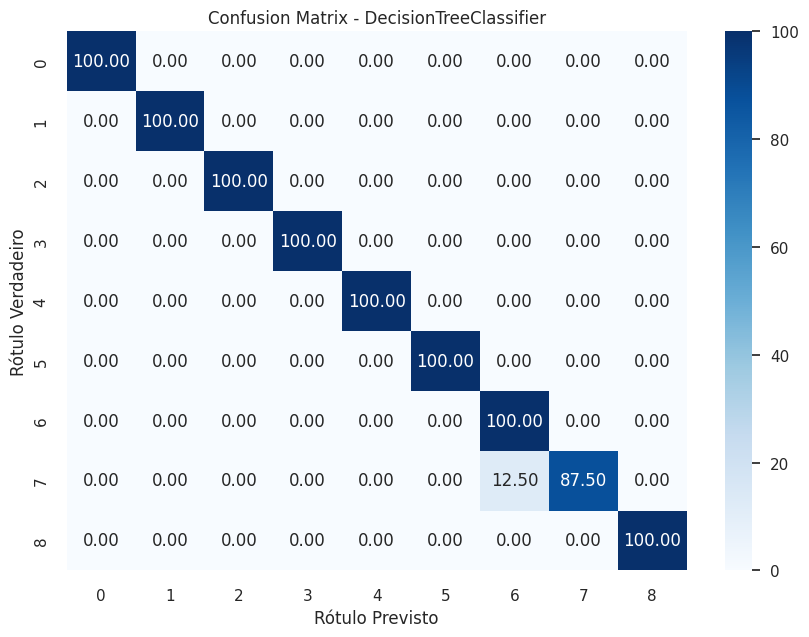

DecisionTreeClassifier: 98.780% (KFold)/98.699% (Cross-Validation)
Accuracy: 98.780% => Precision: 98.987% => Recall: 98.780% => F1 Score: 98.779%


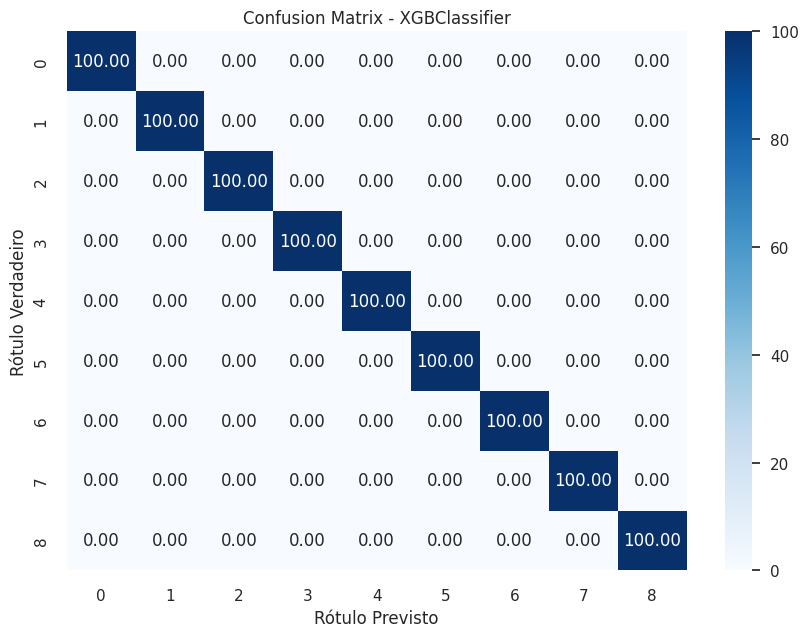

XGBClassifier: 98.862% (KFold)/98.049% (Cross-Validation)
Accuracy: 98.862% => Precision: 99.030% => Recall: 98.862% => F1 Score: 98.832%


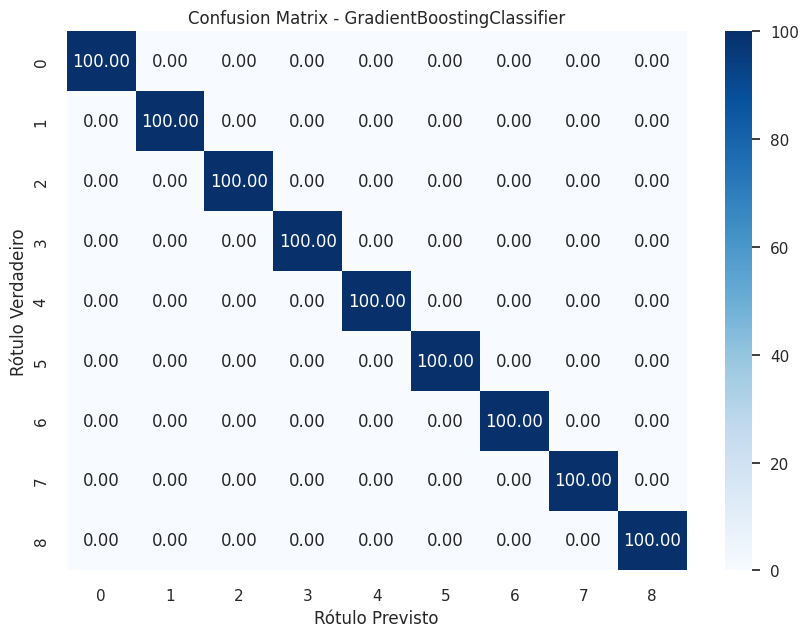

GradientBoostingClassifier: 98.780% (KFold)/97.561% (Cross-Validation)
Accuracy: 98.780% => Precision: 98.944% => Recall: 98.780% => F1 Score: 98.716%


In [ ]:
decision_tree_1 = DecisionTreeClassifier()
xgb1 = xgb.XGBClassifier()
knn1 = KNeighborsClassifier()
naive_bayes_1 = GaussianNB()
random_forest_1 = RandomForestClassifier(random_state=42)
grad_boost_1 = GradientBoostingClassifier(random_state=42)
ada_boost_1 = AdaBoostClassifier(random_state=42)
svm1 = SVC(random_state=42, probability=True)
mlp1 = MLPClassifier(random_state=42)

models1 = [decision_tree_1, xgb1, grad_boost_1]

for model in models1:
    acc_kfold, precision_kfold, recall_kfold, f1_kfold = training_with_Stratified_KFold(model, X, y)
    acc_cross = training_with_cross_val_score(model, X, y)

    models_names.append(f"{model.__class__.__name__} 1")
    all_accuracy_scores.append(acc_kfold)
    all_cross_val_scores.append(acc_cross)
    all_f1_scores.append(f1_kfold)
    all_precision_scores.append(precision_kfold)
    all_recall_scores.append(recall_kfold)

    print(f"{model.__class__.__name__}: {100 * acc_kfold:.3f}% (KFold)/{100 * acc_cross:.3f}% (Cross-Validation)")
    print(f"Accuracy: {100 * acc_kfold:.3f}% => Precision: {100 * precision_kfold:.3f}% => Recall: {100 * recall_kfold:.3f}% => F1 Score: {100* f1_kfold:.3f}%")


In [ ]:
"""
decision_tree_2 = DecisionTreeClassifier()
xgb2 = xgb.XGBClassifier()
knn2 = KNeighborsClassifier()
naive_bayes_2 = GaussianNB()
random_forest_2 = RandomForestClassifier(random_state=42)
grad_boost_2 = GradientBoostingClassifier(random_state=42)
ada_boost_2 = AdaBoostClassifier(random_state=42)
svm2 = SVC(random_state=42, probability=True)
mlp2 = MLPClassifier(random_state=42)

models2 = [decision_tree_2, xgb2, knn2, naive_bayes_2, random_forest_2, grad_boost_2, ada_boost_2, svm2, mlp2]

for model in models2:
    acc_kfold2, precision_kfold2, recall_kfold2, f1_kfold2 = training_with_Stratified_KFold(model, X_filtered, y_filtered)
    acc_cross2 = training_with_cross_val_score(model, X_filtered, y_filtered)
    
    models_names.append(f"{model.__class__.__name__} 2")
    all_accuracy_scores.append(acc_kfold2)
    all_cross_val_scores.append(acc_cross2)
    all_f1_scores.append(f1_kfold2)
    all_precision_scores.append(precision_kfold2)
    all_recall_scores.append(recall_kfold2)

    print(f"{model.__class__.__name__}: {100 * acc_kfold2:.3f}% (KFold)/{100 * acc_cross2:.3f}% (Cross-Validation)")
    print(f"Accuracy: {100 * acc_kfold2:.3f}% => Precision: {100 * precision_kfold2:.3f}% => Recall: {100 * recall_kfold2:.3f}% => F1 Score: {100* f1_kfold2:.3f}%")
"""

'\ndecision_tree_2 = DecisionTreeClassifier()\nxgb2 = xgb.XGBClassifier()\nknn2 = KNeighborsClassifier()\nnaive_bayes_2 = GaussianNB()\nrandom_forest_2 = RandomForestClassifier(random_state=42)\ngrad_boost_2 = GradientBoostingClassifier(random_state=42)\nada_boost_2 = AdaBoostClassifier(random_state=42)\nsvm2 = SVC(random_state=42, probability=True)\nmlp2 = MLPClassifier(random_state=42)\n\nmodels2 = [decision_tree_2, xgb2, knn2, naive_bayes_2, random_forest_2, grad_boost_2, ada_boost_2, svm2, mlp2]\n\nfor model in models2:\n    acc_kfold2, precision_kfold2, recall_kfold2, f1_kfold2 = training_with_Stratified_KFold(model, X_filtered, y_filtered)\n    acc_cross2 = training_with_cross_val_score(model, X_filtered, y_filtered)\n    \n    models_names.append(f"{model.__class__.__name__} 2")\n    all_accuracy_scores.append(acc_kfold2)\n    all_cross_val_scores.append(acc_cross2)\n    all_f1_scores.append(f1_kfold2)\n    all_precision_scores.append(precision_kfold2)\n    all_recall_scores.app

/tmp/ipykernel_1533/2658541077.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=models_names, y=all_accuracy_scores, ax=ax, palette="plasma", saturation=0.7, ci=None, errwidth=0.5)


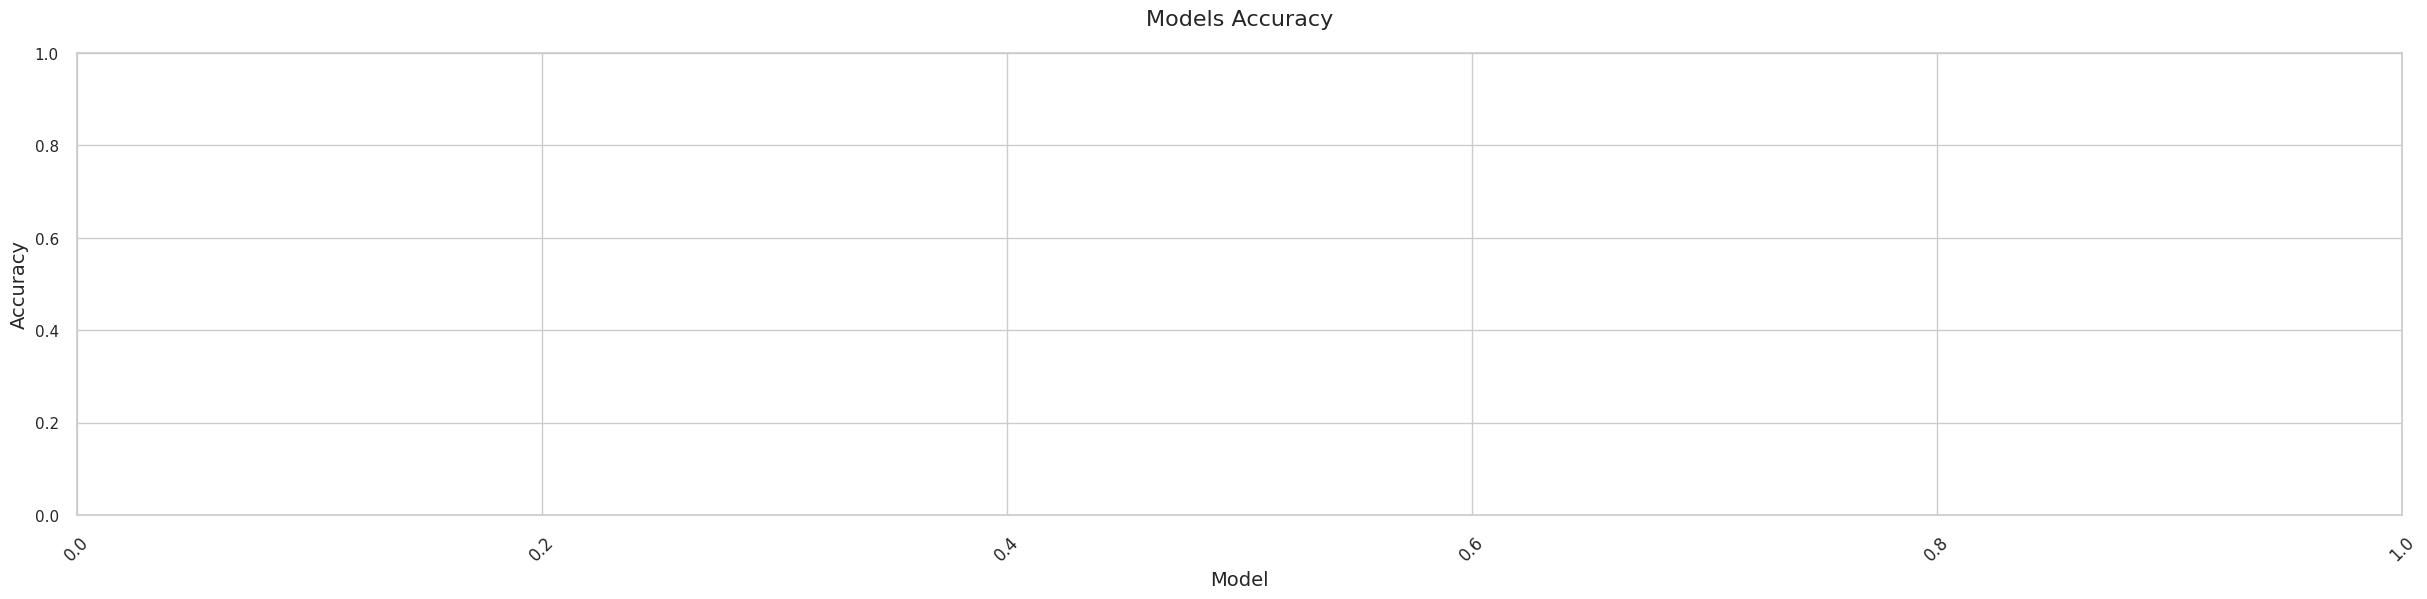

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x=models_names, y=all_accuracy_scores, ax=ax, palette="plasma", saturation=0.7, ci=None, errwidth=0.5)

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Models Accuracy', fontsize=16, pad=20)

plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.show()
plt.close()

/tmp/ipykernel_1533/2136976466.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_long, ax=ax, palette="plasma", saturation=0.7, ci=None)
/tmp/ipykernel_1533/2136976466.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


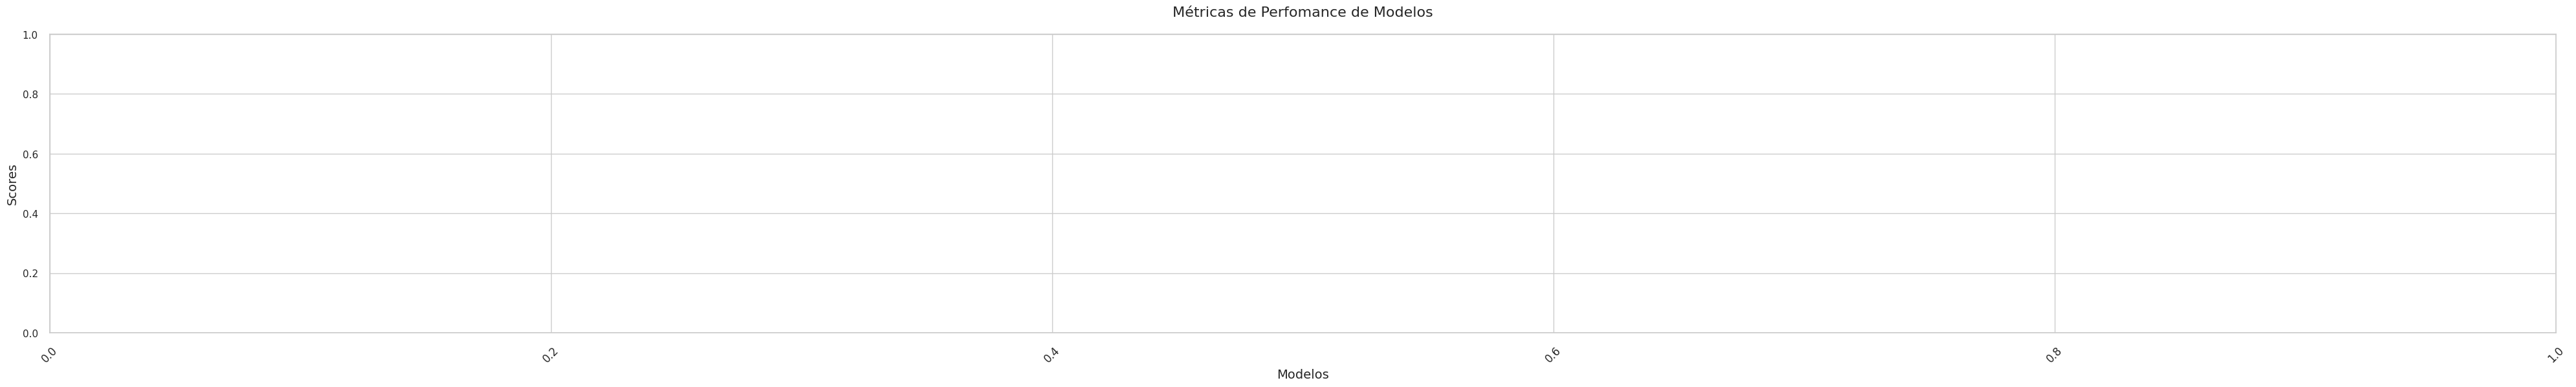

In [ ]:
data = {
    'Model': models_names,
    'Accuracy': all_accuracy_scores,
    'Cross-Validation-Accuracy': all_cross_val_scores,
    'F1 Score': all_f1_scores,
    'Precision': all_precision_scores,
    'Recall': all_recall_scores
}

stats = pd.DataFrame(data)

df_long = pd.melt(stats, id_vars=['Model'], var_name='Metric', value_name='Score')

sns.set(style="whitegrid")
sns.set_palette("viridis")

fig, ax = plt.subplots(figsize=(50, 6))

bar_plot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_long, ax=ax, palette="plasma", saturation=0.7, ci=None)

ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Métricas de Perfomance de Modelos', fontsize=16, pad=20)

plt.xticks(rotation=45, fontsize=12)

plt.ylim(0, 1)

for p in bar_plot.patches:
  try:
    height = p.get_height()
    ax.annotate(f'{height:.3}',
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center',
                xytext=(0, 0),
                textcoords='offset points',
                fontsize=10, color='white', rotation=90)
  except ValueError:
    pass

for patch in bar_plot.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 1.2)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()
plt.close()

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (1).

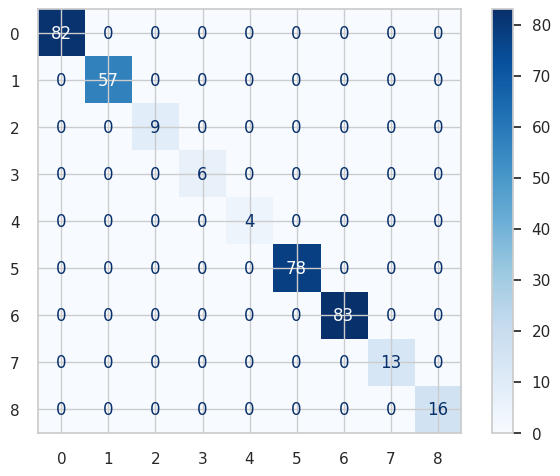